<a href="https://colab.research.google.com/github/eltonmakomo/repository2/blob/main/ASSIGNMENT2_R195929Y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAJOR** **IMPORTS**

In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from numpy import array
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


**MOUNTING** **THE** **DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount =True)

Mounted at /content/drive


In [ ]:
Telco_customer_churn = pd.read_csv('/content/drive/My Drive/Assignment2/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
Telco_customer_churn.shape

(7043, 21)

In [ ]:
Telco_customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
Telco_customer_churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
Telco_customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
Telco_customer_churn['Churn'].unique()

array(['No', 'Yes'], dtype=object)

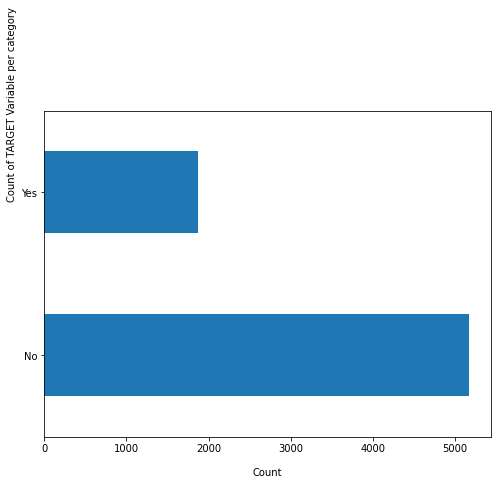

In [ ]:
#1st indetifying Churnning Ratio
Telco_customer_churn['Churn'].value_counts().plot(kind ='barh', figsize =(8,6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Count of TARGET Variable per category', y = 1.02 );

In [ ]:
100*Telco_customer_churn['Churn'].value_counts()/len(Telco_customer_churn['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [ ]:
Telco_customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#creating a copy of base data for manipulation and processing
Telco_df = Telco_customer_churn.copy()

In [ ]:
#converting total charges to numeric data type
Telco_df.TotalCharges = pd.to_numeric(Telco_df.TotalCharges, errors ='coerce')
Telco_df.isnull().sum()   #checking missing values and finding the total

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
Telco_df.loc[Telco_df['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#Removing missing values
Telco_df.dropna(how='any', inplace = True) 

In [ ]:
#calculating correlations
Telco_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [ ]:
print(Telco_df.tenure.max())  #finding maximum months for Tenure

72


In [ ]:
#therefore grouping into groups of 12, to get 6 groups
labels =['{0} - {1}'.format(i, i +11) for i in range( 1, 72, 12 )]
Telco_df['tenure_group']= pd.cut(Telco_df.tenure, range(1, 80, 12), right =False, labels=labels )

In [ ]:
Telco_df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
Telco_df.drop(columns=['customerID', 'tenure'], axis= 1, inplace = True)
Telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


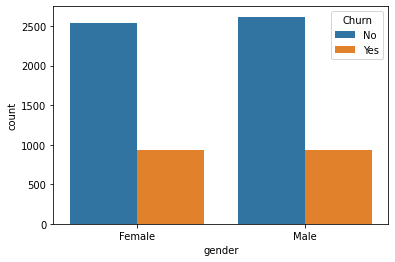

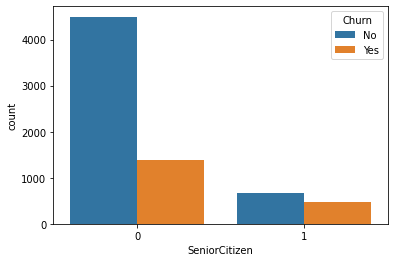

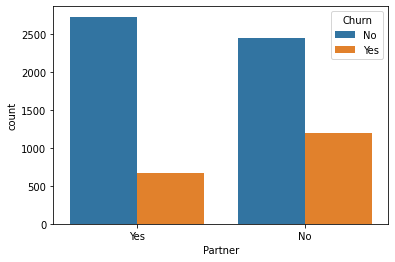

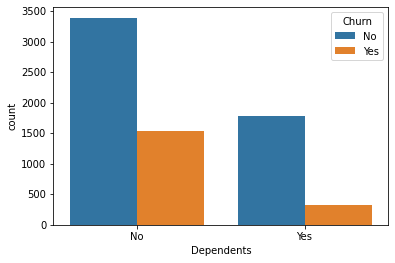

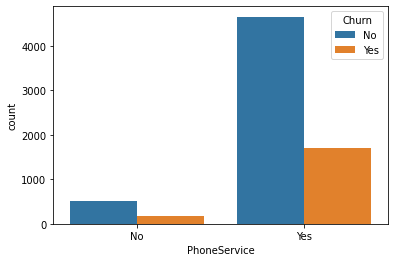

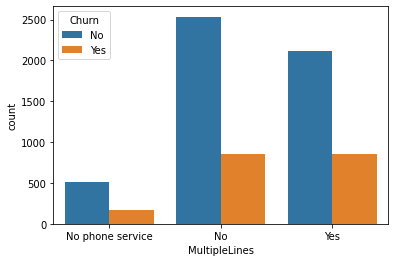

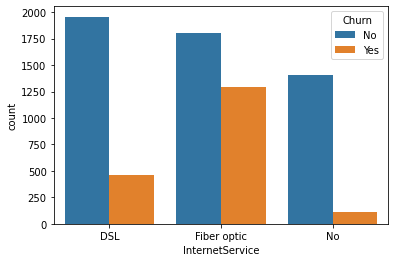

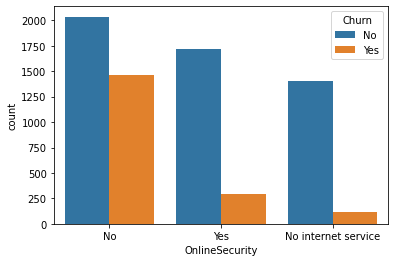

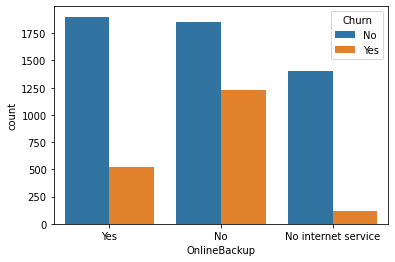

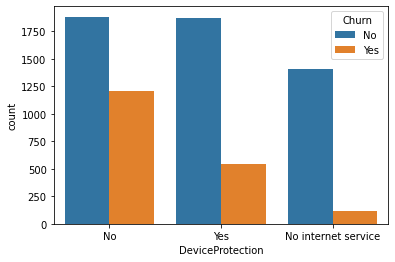

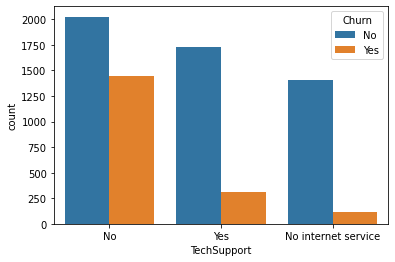

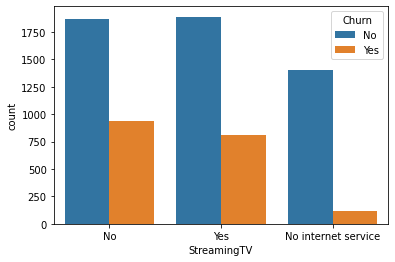

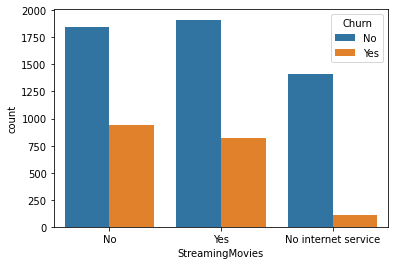

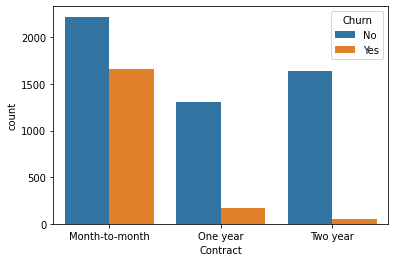

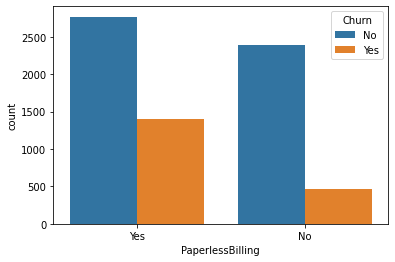

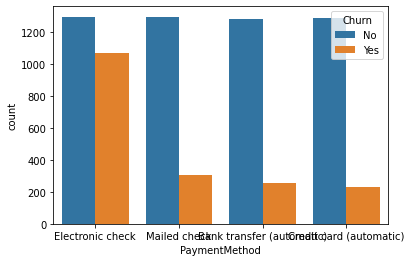

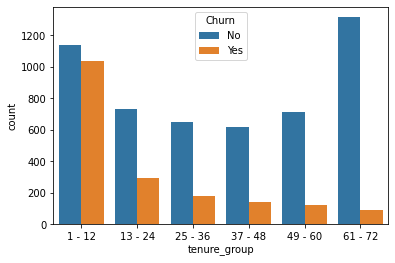

In [ ]:
for i, predictor in enumerate(Telco_df.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data= Telco_df, x= predictor, hue = 'Churn')

In [ ]:
Telco_df['Churn'] = np.where(Telco_df.Churn == 'Yes', 1 , 0)

In [ ]:
Telco_df_dummies = pd.get_dummies(Telco_df)
Telco_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


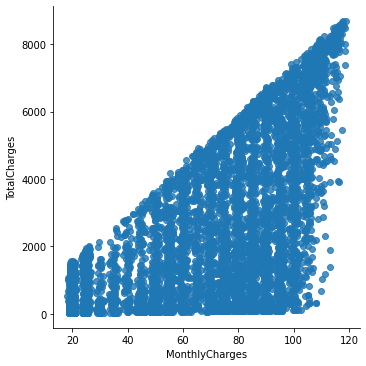

In [ ]:
sns.lmplot(data=Telco_df_dummies , x = 'MonthlyCharges', y ='TotalCharges', fit_reg = False)

Text(0.5, 1.0, 'Monthly charges churn')

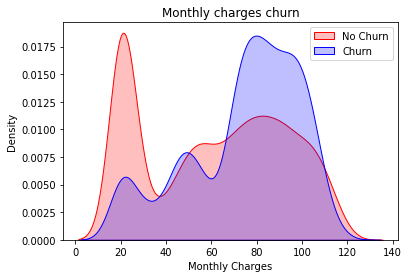

In [ ]:
Mth = sns.kdeplot(Telco_df_dummies.MonthlyCharges[(Telco_df_dummies["Churn"] == 0)],
                  color ='Red',shade =True)
Mth = sns.kdeplot(Telco_df_dummies.MonthlyCharges[(Telco_df_dummies['Churn']== 1)],
                  ax = Mth, color ='Blue', shade =True)
Mth.legend(['No Churn', 'Churn'], loc ='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges churn')


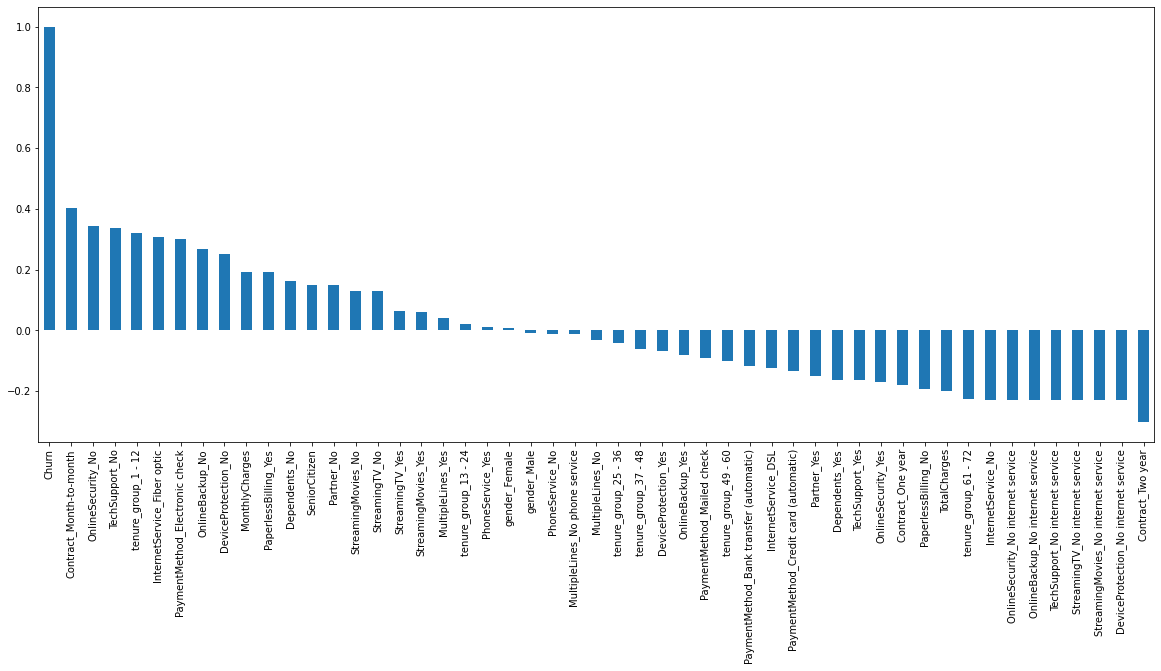

In [ ]:
plt.figure(figsize =(20,8))
Telco_df_dummies.corr()['Churn'].sort_values(ascending =False).plot(kind ='bar')

In [ ]:
df = Telco_df_dummies.copy()

Building The Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#creating X and Y Variables
x = df.drop('Churn', axis =1)
print(x) 

      SeniorCitizen  MonthlyCharges  ...  tenure_group_49 - 60  tenure_group_61 - 72
0                 0           29.85  ...                     0                     0
1                 0           56.95  ...                     0                     0
2                 0           53.85  ...                     0                     0
3                 0           42.30  ...                     0                     0
4                 0           70.70  ...                     0                     0
...             ...             ...  ...                   ...                   ...
7038              0           84.80  ...                     0                     0
7039              0          103.20  ...                     0                     1
7040              0           29.60  ...                     0                     0
7041              1           74.40  ...                     0                     0
7042              0          105.65  ...                     0   

In [ ]:
#creating X and Y variables
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

**Building The XGBOOST MODEL**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 
            'binary:logistic',n_jobs=-1).fit(x_train, y_train)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Accuracy of XGBOOST on training set
xgb_model.score(x_train, y_train)

0.8423111111111111

In [ ]:
#Accuracy of XGBOOST on test set and AUC
y_pred = xgb_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
score

0.814498933901919

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1020
           1       0.71      0.55      0.62       387

    accuracy                           0.81      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.81      0.81      0.81      1407



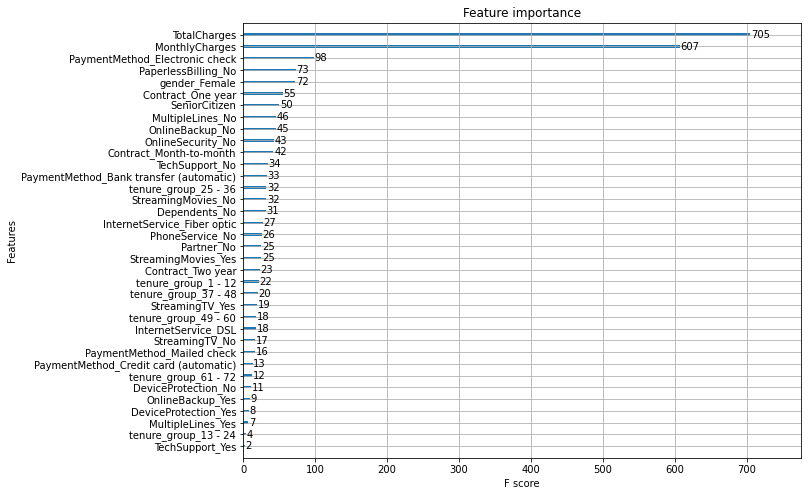

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [ ]:
from sklearn.externals import joblib

In [ ]:
#params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                'max_depth': 5, 'alpha': 10}
#classification = xgb.XGBClassifier(**params)

In [ ]:
joblib.dump(classification, 'AI_model.pkl')

['AI_model.pkl']